<a href="https://colab.research.google.com/github/RogerHeederer/NLP_entry/blob/master/Word2Vec_Eng_Kor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Reference Source : wikidocs.net 유영준님 자료

스스로 학습하면서 필요한 부분에는 추가적 설명, 소스 코드 삽입 및 수정 등이 있습니다. 영리적 목적이 아닌, 자기 계발 목적으로 정리한 자료입니다.

In [ ]:
import re
from lxml import etree
import urllib.request
import zipfile
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
urllib.request.urlretrieve("https://wit3.fbk.eu/get.php?path=XML_releases/xml/ted_en-20160408.zip&filename=ted_en-20160408.zip", filename="ted_en-20160408.zip")
# 데이터 다운로드

with zipfile.ZipFile('ted_en-20160408.zip', 'r') as z:
  target_text = etree.parse(z.open('ted_en-20160408.xml', 'r'))
  parse_text = '\n'.join(target_text.xpath('//content/text()'))
# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.

In [ ]:
parse_text[:300]

"Here are two reasons companies fail: they only do more of the same, or they only do what's new.\nTo me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation. Both are necessary, but it can be too much of a good thing.\nConsider Facit"

In [4]:
#전처리 수행
content_text = re.sub(r'\([^)]*\)', '', parse_text) #괄호로 구성된 내용 제거

In [5]:
content_text[:500]

"Here are two reasons companies fail: they only do more of the same, or they only do what's new.\nTo me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation. Both are necessary, but it can be too much of a good thing.\nConsider Facit. I'm actually old enough to remember them. Facit was a fantastic company. They were born deep in the Swedish forest, and they made the best mechanical calculators in the world. Everybody used them. A"

In [9]:
import nltk
nltk.download('punkt')
sent_text = sent_tokenize(content_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
sent_text[:10]

["Here are two reasons companies fail: they only do more of the same, or they only do what's new.",
 'To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation.',
 'Both are necessary, but it can be too much of a good thing.',
 'Consider Facit.',
 "I'm actually old enough to remember them.",
 'Facit was a fantastic company.',
 'They were born deep in the Swedish forest, and they made the best mechanical calculators in the world.',
 'Everybody used them.',
 'And what did Facit do when the electronic calculator came along?',
 'They continued doing exactly the same.']

In [12]:
normalized_text = []
for string in sent_text:
  tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
  normalized_text.append(tokens)
  #각 문장에 대해 구두점 제거. 대문자->소문자 변환

result = [word_tokenize(sentence) for sentence in normalized_text] #토크나이징

In [16]:
print(result[:1])

[['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']]


In [17]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [18]:
for line in result[:3]:
  print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


##Word2vec 훈련##

In [20]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)
#Size : 임베딩 된 벡터의 차원
#window : 컨텍스트 윈도우 크기
#min_count : 단어 최소 빈도수 제한(빈도가 적은 단어들은 학습하지 않는다)
#workers : 학습을 위한 프로세스 수
#sg : 0은 Cbow, 1은 skip-grap

In [23]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8550637364387512), ('guy', 0.8036016225814819), ('lady', 0.7868484854698181), ('girl', 0.7679060101509094), ('boy', 0.7643465995788574), ('gentleman', 0.7486835718154907), ('poet', 0.7011629939079285), ('soldier', 0.6977251172065735), ('kid', 0.6971875429153442), ('john', 0.6511352062225342)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [24]:
#모델 저장하기
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v')
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [25]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8550637364387512), ('guy', 0.8036016225814819), ('lady', 0.7868484854698181), ('girl', 0.7679060101509094), ('boy', 0.7643465995788574), ('gentleman', 0.7486835718154907), ('poet', 0.7011629939079285), ('soldier', 0.6977251172065735), ('kid', 0.6971875429153442), ('john', 0.6511352062225342)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


##한국어 워드투백

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
!pip install konlpy
from konlpy.tag import Okt

     |████████████████████████████████| 19.4MB 1.5MB/s 
     |████████████████████████████████| 92kB 9.3MB/s 
     |████████████████████████████████| 3.8MB 37.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [28]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f25ec1aae48>)

In [30]:
train_data = pd.read_table('ratings.txt')

In [31]:
train_data[:5]

id                                           document  label
0   8112052                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ      1
1   8132799  디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...      1
2   4655635               폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.      1
3   9251303  와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...      1
4  10067386                        안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.      1

In [32]:
print(len(train_data))

200000


In [33]:
print(train_data.isnull().values.any())

True


In [34]:
train_data = train_data.dropna(how = 'any') # null 값이 존재하는 행 자체 제거
print(train_data.isnull().values.any())

False


In [36]:
print(len(train_data))

199992


In [37]:
#정규 표현식 통해서 한글 외 문자 제거하기
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

id                                           document  label
0   8112052                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ      1
1   8132799  디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...      1
2   4655635                   폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고      1
3   9251303   와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지      1
4  10067386                         안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화      1

In [38]:
#불용어 자체적으로 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [39]:
#형태소 분석기 OKT를 사용하여 토큰화 작업
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
  temp_X = okt.morphs(sentence, stem=True) #토큰화
  temp_X = [word for word in temp_X if not word in stopwords] #불용어 제거
  tokenized_data.append(temp_X)

리뷰의 최대 길이:  72
리뷰의 평균 길이 : 10.716703668146726


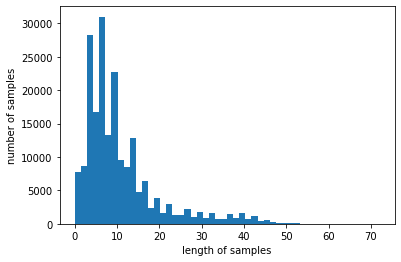

In [40]:
print('리뷰의 최대 길이: ',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [42]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [43]:
model.wv.vectors.shape

(16477, 100)

In [45]:
print(model.wv.most_similar("전지현"))

[('하지원', 0.8842602372169495), ('손예진', 0.8679162263870239), ('신민아', 0.866439938545227), ('김하늘', 0.8556297421455383), ('차승원', 0.850385308265686), ('임창정', 0.8449187278747559), ('장나라', 0.8378487229347229), ('임수정', 0.8374968767166138), ('공효진', 0.8352034687995911), ('유아인', 0.8317688703536987)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [48]:
print(model.wv.most_similar("느와르"))

[('무협', 0.9109175801277161), ('블록버스터', 0.862953782081604), ('헐리우드', 0.8447136878967285), ('호러', 0.8439632058143616), ('히어로', 0.8376718759536743), ('헐리웃', 0.8303461074829102), ('정통', 0.8241472244262695), ('교과서', 0.8163762092590332), ('에로물', 0.8156889081001282), ('무비', 0.8156270980834961)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
